# Project Business Statistics: E-news Express


## Problem Statement

### Business Context

The advent of e-news, or electronic news, portals have offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings

# Library to help with statistical analysis
import scipy.stats as stats


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#To ignore the warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


## Reading the Data into a DataFrame

In [ ]:
#To read the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Business Statistics/Project2/abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

#### Displaying the first few rows of the dataset

In [ ]:
# To view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#To view the last few rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#To get the total no of rows and columns
print("There are",df.shape[0],"rows and ",df.shape[1],"columns.")

There are 100 rows and  6 columns.


In [ ]:
# To print the numerical summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations:

* user id is just identifier for each user.

* The time_spent_on_the_page ranges from .19 to 10.71 minutes dollars, with an average around 5.38 minutes ,median around 5.415 and  a standard deviation of 2.378.

In [ ]:
# To print the categorical summary statistics
df.describe( include = 'object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
* There are a total of 100 non-null observations in each of the columns.

* The dataset contains 6 columns: 4 are of object type ('group ','landing_page', 'converted', 'language_preferred '), 1 is of floating point type ('time_spent_on_the_page') and 1 is of integer  type ('user id')
* Total memory usage is approximately 4.8+ KB

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


#### Observations:

* There are no missing values in the data.

### Check for duplicates

In [ ]:
#Check for duplicated values
df.duplicated().sum()

0

#### Observations:

* There are no duplicted values in the data.

# **Univariate Analysis**

## **User ID**

In [ ]:
df['user_id'].nunique()

100

There are 100 unique user ids.They are just identifiers

# **Time spent on the page**

Sample mean: 5.38
Sample median: 5.42


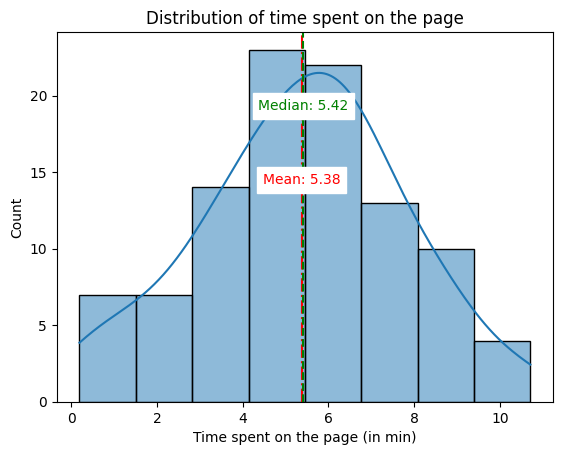

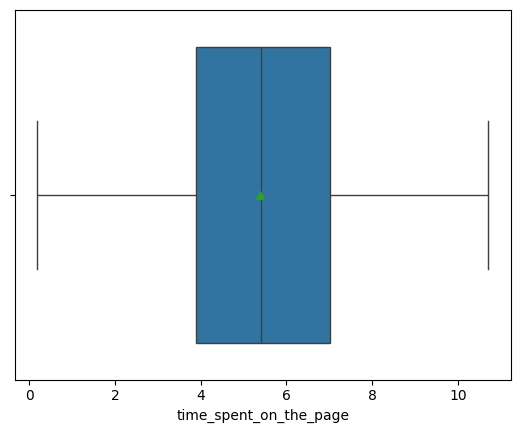

In [ ]:
plt.title('Distribution of time spent on the page')
plt.xlabel('Time spent on the page (in min)')
sns.histplot(data=df,x='time_spent_on_the_page',kde = 'True')

#to find the mean and median of the time spent on the page from the data
mean_value = df['time_spent_on_the_page'].mean()
median_value = df['time_spent_on_the_page'].median()
print('Sample mean:', round(mean_value,2))
print('Sample median:', round(median_value,2))

#Add vertical line to the plot to highlight mean
plt.axvline(df['time_spent_on_the_page'].mean(),label= 'mean',color = 'red',linestyle = '-.');
plt.text(mean_value, plt.ylim()[1] * 0.6, f'Mean: {mean_value:.2f}',color='red', ha='center', va='center', backgroundcolor='white')

#Add vertical line to the plot to highlight median
plt.axvline(df['time_spent_on_the_page'].median(),label = 'median',color = 'green',linestyle = '--');
plt.text(median_value, plt.ylim()[1] * 0.8, f'Median: {median_value :.2f}',color='green', ha='center', va='center', backgroundcolor='white')
plt.show();

sns.boxplot(data=df,x='time_spent_on_the_page',showmeans = 'True')
plt.show()

#### Observations:

* The average time_spent_on_the_page is almost equal to the median time_spent_on_the_page indicating that the distribution is nearly symmetrical.

* The time_spent_on_the_page is pretty evenly distributed between .19 and 10.71 minutes.

* There are no outliers in this column.

# Group

In [ ]:
#Let us see the different values available for group
df['group'].value_counts()

,count
group,
control,50
treatment,50


Observations

*   The two different groups available are 'control' and 'treatment' group

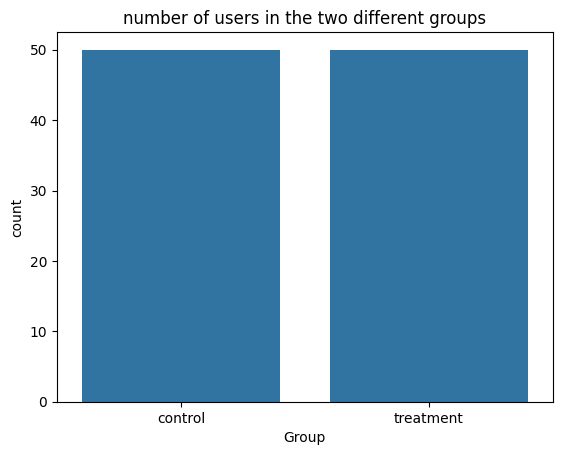

In [ ]:
# No of users in the two different groups
plt.title('Number of users in the two different groups')
plt.xlabel('Group')
sns.countplot(data=df,x='group')
plt.show()

#### Observations:

* The 'group' columns consists of 2 unique values - control and treatment
* Total number of both the values are equal to 50

#### Landing page

In [ ]:
#Let us see the different values available for 'landing page'
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


Observations

*   The two different values available for landing page are 'old and 'new'

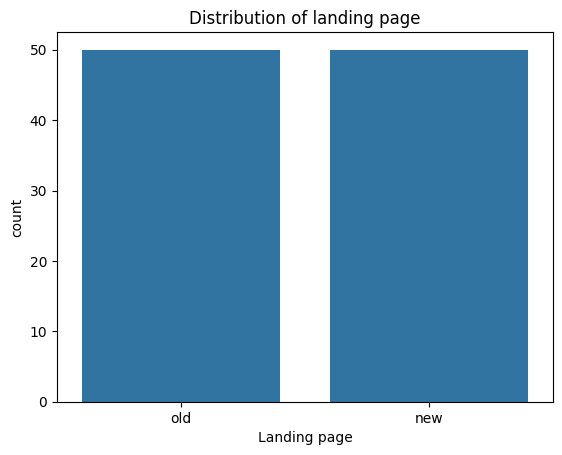

In [ ]:
# to plot the distribution of landing_page among the users
plt.title('Distribution of landing page')
plt.xlabel('Landing page')
sns.countplot(data=df,x='landing_page')
plt.show()

#### Observations:

* The 'landing page' columns consists of 2 unique values - old and new
* Total number of both the values are equal to 50

#### Converted

In [ ]:
df['converted'].value_counts()

,count
converted,
yes,54
no,46


Observations


*   No of users who got converted to subscribers according to the data is 54
*   No of users who didn't get converted to subscribers according to the data is 46



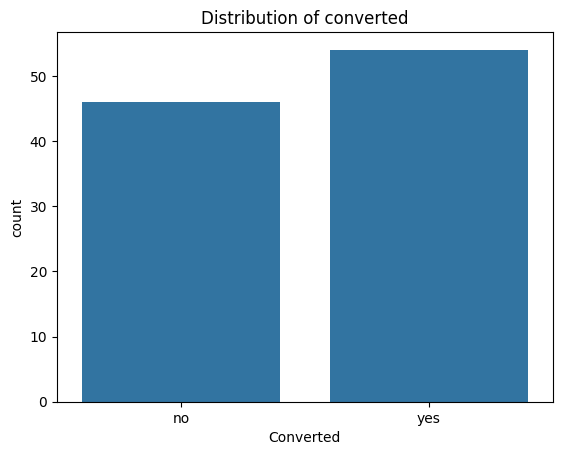

In [ ]:
# to plot the no of users who got and didn't get converted
plt.title('Distribution of converted')
plt.xlabel('Converted')
sns.countplot(data=df,x='converted')
plt.show()

#### Observations:

* The 'converted' columns consists of 2 unique values - yes and no
* Number of 'yes' value is greater than number of 'no' value
* No of 'yes' value is 54
* Number of 'no' value is 46

#### Language preferred

In [ ]:
#different values for language preferred
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


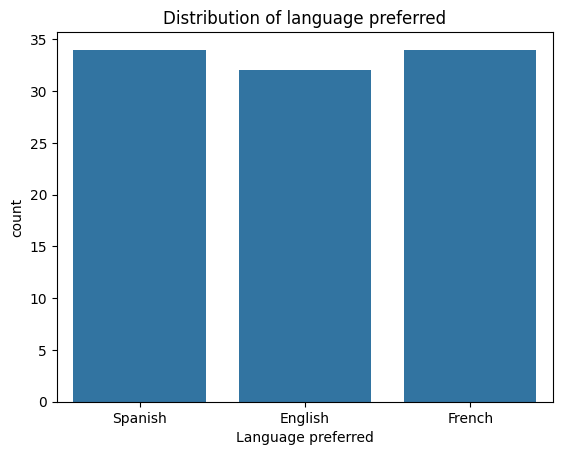

In [ ]:
# To plot the distribution of language preferred
plt.title('Distribution of language preferred')
plt.xlabel('Language preferred')
sns.countplot(data=df,x='language_preferred')
plt.show()

#### Observations:

* The 'language_preferred' column consists of 3 unique values - Spanish,English and French
* Spanish and French are preferred more compared to English

### Bivariate Analysis

#### Landing page vs Time spent on the page

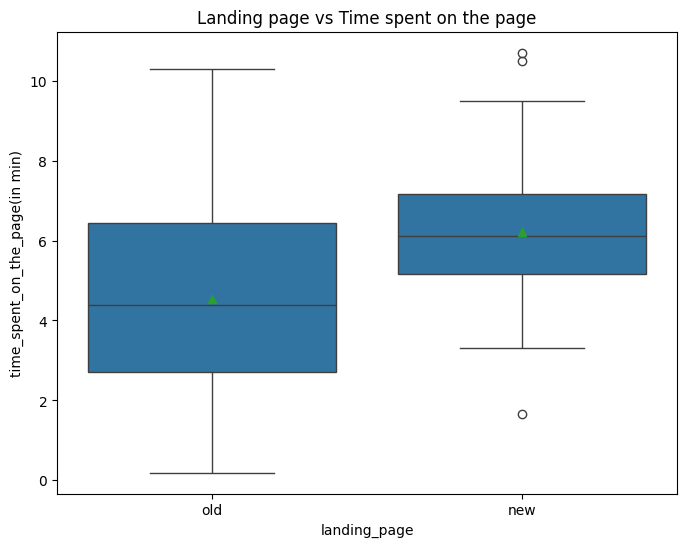

In [ ]:
#Relationship between landing_page and time_spent_on _the _page
plt.figure(figsize=(8,6))
plt.title('Landing page vs Time spent on the page')
plt.xlabel('landing_page')
plt.ylabel('time_spent_on_the_page(in min)')
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',showmeans = 'True')
plt.show()




*   The mean and median of the time spent on the new page appear to be higher when comapred to old page
*   IQR is also wider for the old page,indicating more variability in the time spent on the old page
*   The time spent on the new page has an outliers present.
*   The new page appears to result in higher engagement (as measured by time spent on the page) with less variability compared to the old page.

#### Conversion status vs Time spent on the page

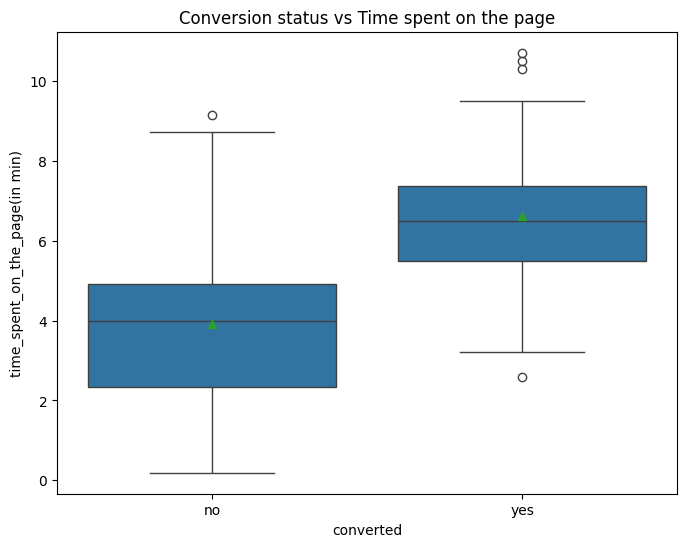

In [ ]:
# Relation between converted status vs Time spent on the page
plt.figure(figsize=(8,6))
plt.title('Conversion status vs Time spent on the page')
plt.xlabel('converted')
plt.ylabel('time_spent_on_the_page(in min)')
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page',showmeans = 'True')
plt.show()




*   The mean and median of the time spent on the page by the user with converted status = 'yes'(ie users who got coverted to subscribers) is greater than the user with converted status 'no'(ie users who didn't get converted)

*   IQR is also wider for the the user with converted status 'no',indicating more variability in the time spent on the  page by the user

*   There are some outliers for both groups, particularly for the "yes" group where a few users spent much longer times on the page.

*   The time spent on the page is higher for users who got converted to subscriber as compared to users who didn't get convert to subscribers.

*   We can also infer from the data that the users who spend more time on the page seem more likely to convert.






**Language preferred vs Time spent on the page**

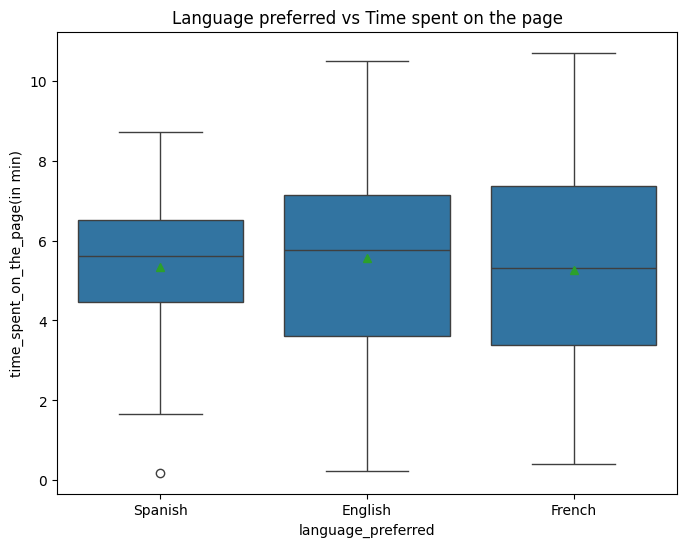

In [ ]:
#Let us try to see the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(8,6))
plt.title('Language preferred vs Time spent on the page')
plt.xlabel('language_preferred')
plt.ylabel('time_spent_on_the_page(in min)')
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page',showmeans = 'True')
plt.show()


In [ ]:
#Let us find the mean time spent on the page by different languages from the data
df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,5.559062
French,5.253235
Spanish,5.331765


Observations:


*   The median is slightly higher for English followed by Spanish and French.

*   English and French have a broader interquartile range (IQR) than Spanish, indicating more variability in the time spent.

*   There is an outlier in the Spanish category with a very low time spent.

*   The mean time spent on the page is almost the same for all the 3 languages,with English users having the highest mean of 5.56 min



**Landing page vs Conversion status**


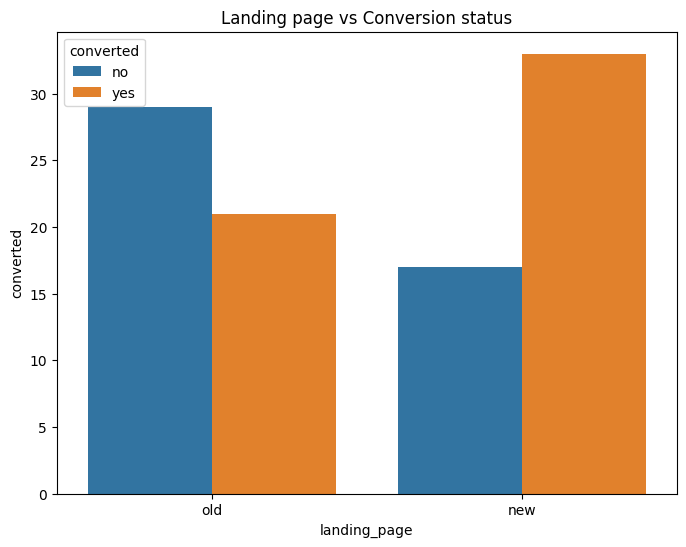

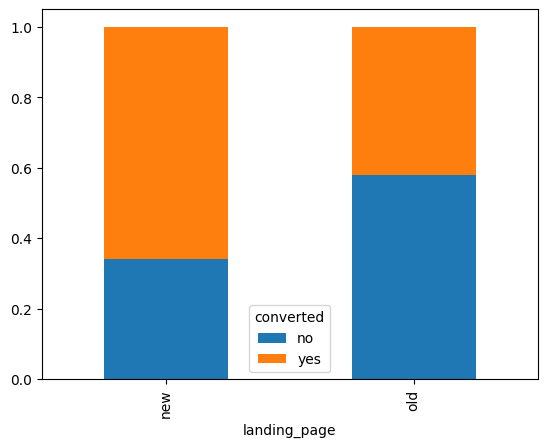

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Landing page vs Conversion status')
plt.xlabel('landing_page')
plt.ylabel('converted')
sns.countplot(data=df,x='landing_page',hue='converted')
plt.show()
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind='bar',stacked=True)
plt.show()




*   The proprtion of converted users is higher in the case of users landing on the new page(treatment group) compared to users landing on the old page(control group)

Language preferred vs Converted

<Figure size 800x600 with 0 Axes>

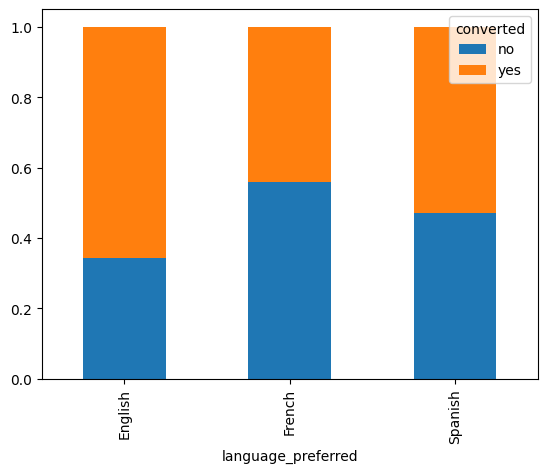

In [ ]:
#Relation between language preferred and conversion status
plt.figure(figsize=(8,6))
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind='bar',stacked=True)
plt.show()



*   The proportion of users who got converted to subscribers is highest in the case of users who preferred English language followed by Spanish and French

**Language preferred vs Group**

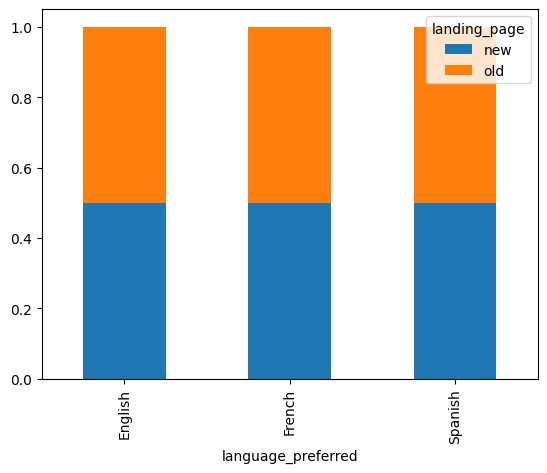

In [ ]:
pd.crosstab(df['language_preferred'],df['landing_page'],normalize='index').plot(kind='bar',stacked=True)
plt.show()



*   The proportion of users landing on the old and new page remains the same for all the languages

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

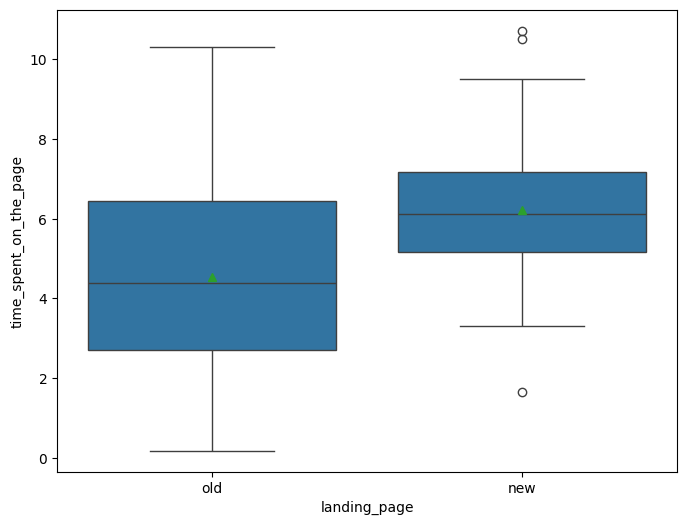

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df,showmeans = True)
plt.show()



*   From the visual analysis of the sample data new page appears to result in higher engagement (as measured by time spent on the page) with less variability compared to the old page.


### Step 1: Define the null and alternate hypotheses

Let  μ1,μ2  be the mean time spent on the old page and
 new page respectively.

$H_0$: Users spend equal time on both the new and old pages.,ie μ1 = μ2

$H_a$: Users spend more time on the new page than the old page.μ1 < μ2

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown.
*   Here we are using **ttest_ind()** to compare two sample means from two independent populations when population  standard deviations are unknown

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
#create data of time spent by new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

#create data of time spent by old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

print("The Standard deviation of time spent on new landing page",round(time_spent_new.std(),2))
print("The Standard deviation of time spent on old landing page",round(time_spent_old.std(),2))

The Standard deviation of time spent on new landing page 1.82
The Standard deviation of time spent on old landing page 2.58


*   As the sample standard deviations of the two groups are unequal,the population standard deviations are assumed to be unequal.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value(~0.00014) is much smaller than the level of significance, we can reject the null hypothesis. Hence, we do  have enough evidence to conclude that mean time spent on the new page is greater than mean time spent on old page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis


<Figure size 800x600 with 0 Axes>

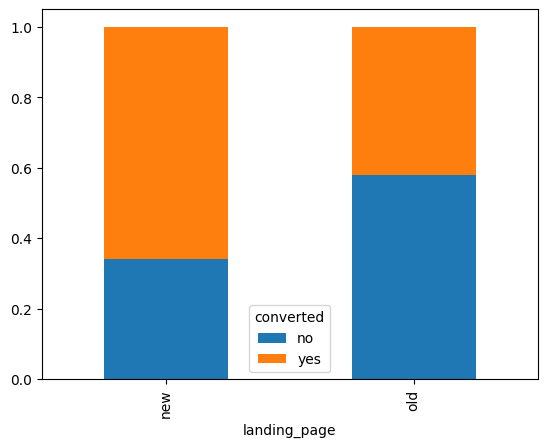

In [ ]:
# visual analysis of the conversion rate for new page and conversion rate of old page
plt.figure(figsize=(8,6))
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind='bar',stacked=True)
plt.show()



*  Above plot shows that more users got converted when they landed on the new page compared to users who landed on old page


### Step 1: Define the null and alternate hypotheses

Let p1 and p2 be the proportion of users landing on the old and new page respectively and gets converted

$H_0:$ Proportion of users landing on the page and gets converted is same for the old and new page,ie p1 = p2

$H_a:$ Proportion of users landing on the page and gets converted is greater for the new page compared to the old page,ie p1<p2

### Step 2: Select Appropriate test


*   The formulated hypotheses are concerned with proportions
*   This is a one-tailed test concerning two population proportions from two independent populations.
*   We can use a proportions_ztest() for this problem.


### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# calculate the number of converted users in the treatment group(group of users with new landing page)
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']

# calculate the number of converted users in the control group(group of users with old landing page))
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df['group'].value_counts()['control'] # total number of users in the control group
n_treatment = df['group'].value_counts()['treatment'] # total number of users in the treatment group

print('The total numbers of users served the new and old pages are {0} and {1} respectively'.format(n_treatment, n_control))
print('The number of converted users in the treatment and control group are {0} and {1} respectively'.format(new_converted,old_converted ))



The total numbers of users served the new and old pages are 50 and 50 respectively
The number of converted users in the treatment and control group are 33 and 21 respectively


In [ ]:
print(f' The proportions of converted users in the control and treatment groups are {round(21/50,2)}, {round(33/50,2)} respectively')

 The proportions of converted users in the control and treatment groups are 0.42, 0.66 respectively


### Let's test whether the Z-test assumptions are satisfied or not

For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50\cdot \frac{50-21}{50} =29\geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $

So **proportions_ztest()** can be used

### Step 5: Calculate the p-value

This test uses the same proportions_ztest() function

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# To calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value(~0.008) is much smaller than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to conclude that **conversion rate for new page is greater than conversion rate for old page**.Or in other words we can say conversion rate of treatment group is greater than conversion rate of control group

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

<Figure size 800x600 with 0 Axes>

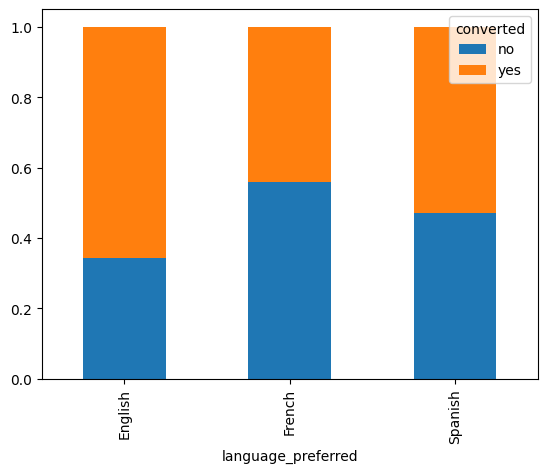

In [ ]:
# visual analysis of the conversion and preferred language
plt.figure(figsize=(8,6))
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind='bar',stacked=True)
plt.show()



*   Based on the sample data we can infer that converted status is dependent on the preferred language

*   From the visual analysis,the proportions of converted users is higher with the English language language users followed by Spanish


### Step 1: Define the null and alternate hypotheses

$H_0:$ Converted status and language preferred are independent of each other

$H_a:$ Converted status and language preferred are dependent on each other

### Step 2: Select Appropriate test

To test the dependence between two categorical variables, a **Chi-square test** for independence is used.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

To perform the chi-squared test of independance, we need to create the contingency table, for which we will use `pd.crosstab()`

In [ ]:
# prepare a contingency table to perform the test
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370832
p-value = 0.2129888748754345
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value(~0.213) is much larger than the level of significance, we fail to reject the null hypothesis. Hence, we don't have enough evidence to conclude that conversion status and language preferred are dependent on each other

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

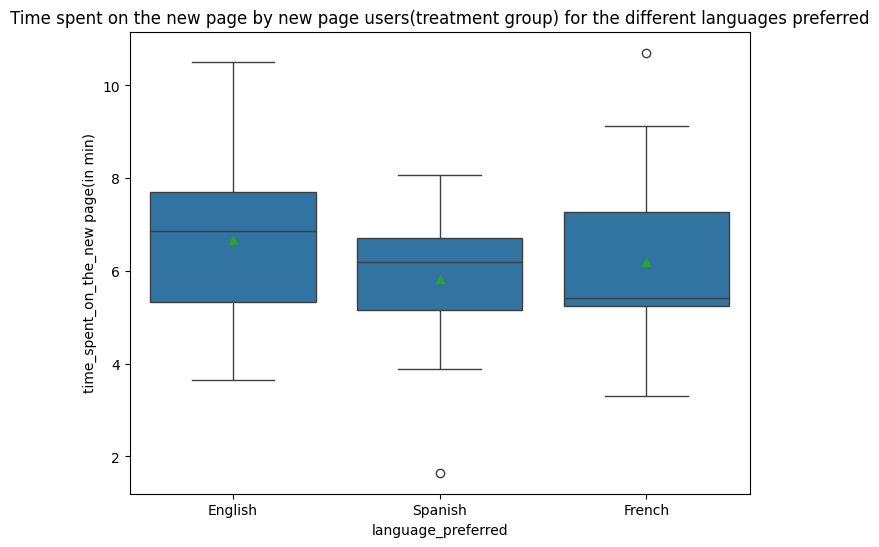

In [ ]:
# create a new dataframe for new page users with time spent on the page and
# language preferred alone
df_new= df.loc[df['landing_page'] == 'new',['time_spent_on_the_page','language_preferred']]

#visual analysis of time spent on the page by new page users(treatment group) for the different languages preferred
plt.figure(figsize=(8,6))
plt.title('Time spent on the new page by new page users(treatment group) for the different languages preferred')
plt.xlabel('language_preferred')
plt.ylabel('time_spent_on_the_new page(in min)')
sns.boxplot(data = df_new,y= 'time_spent_on_the_page',x='language_preferred',showmeans = True)
plt.show()

*   The time spent on the new page seem to differ among the three languages

*   Users with language preferred as English seem to have the highest mean and median of time spent on the page

*   The mean time spent on the page seems to be very close for Spanish and French,but the variation is higher in the time spent on page for French user as compared to Spanish user

*   There are outliers in both Spanish (below the box) and French (above the box), representing users who spent significantly less or more time on the page than the typical range.


In [ ]:
#to find the mean time spent on the new page by each language user
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294




*   The mean time spent on the new page by each language user differ by a very small amount

### Step 1: Define the null and alternate hypotheses

$H_0:$ Time spent on the new page is the same  for different language users

$H_a:$ Time spent on the new page is the different for different language users

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

**One-way ANOVA test**

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The time spent on the new page follow a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the new page  do not not follow a normal distribution

In [ ]:
# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040040364746845


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page'],
                            df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.ie all population variances are  equal

### Step 3: Decide the significance level

Let's set the level of significane (alpha) as 0.05

### Step 4: Collect and prepare data

In [ ]:
#create separate variables to store the time spent on the new page for each language users
time_spent_by_English_users = df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page']
time_spent_by_French_users = df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page']
time_spent_by_Spanish_users = df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page']


### Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(time_spent_by_English_users, time_spent_by_French_users, time_spent_by_Spanish_users)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is greater than the level of significance (5%), we cannot reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the time spent on the new page by different language users are different .

## Conclusion and Business Recommendations

Inferences

*   From the visual analysis of the sample data ,new page appears to result in higher engagement (as measured by time spent on the page) with less variability compared to the old page.
*   Also there is enough statistical evidence to conclude that mean time spent on the new page is greater than mean time spent on old page

* The time spent on the page is higher for users who got converted to subscriber as compared to users who didn't get convert to subscribers.

*   We can also infer that the users who spend more time on the page seem more likely to convert.

* From the sample data's visual analysis,the proprtion of  users who got converted to subscribers is higher in the case of treatment group compared to users in control group

*   Also there is enough statistical evidence to conclude that conversion rate of treatment group is greater than conversion rate of control group

* From the sample data,the proportion of users who got converted to subscribers is highest in the case of users who preferred English language followed by Spanish and French as seen from the visual data analysis.This shows language preference does affect the conversion status

*   Even though from the sample data's visual analysis, it is seen that language prefered and conversion status are dependent,there is no enough statistical evidence to prove that they are dependent

*   Based on the sample data ,there is enough statistical evidence to conclude that the time spent on the new page is the same for different language users

*   From the visual analysis,we can see that there is very small difference in the mean time spent on the page by the different language users

*  From all the above inferences we can conclude that **the new landing page is far more effective than the old landing page to gather more subscribers**

**Business Recommendations**

*  The new landing page is highly effective and recommended for gathering new subscibers for the news portal

*   It has been observed that the more time spent on the page,the more likely it is to get converted to suscribers.So it will be a good practice to keep the landing page updated more frquently so that the existing subscibers would be engaged and the number of new subscribers would also increase.

*  So continue to analyse the action of every visitor  to the website,so that you can understand there interests,gather the information regarding the new trends and update the portal more frequently to ensure better engagement



___